In [1]:
import pandas as pd

df = pd.read_csv("/content/sample_data/dataset1.csv")
df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
2351,1304,Bra Panty Set,0,Not Dark Pattern
2352,1038,DressesFootwearHatsHoodies & SweatshirtsJersey...,0,Not Dark Pattern
2353,1081,Only 4 left in stock,1,Scarcity
2354,767,Trending Players,0,Not Dark Pattern


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install textattack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.8/436.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 769.7/769.7 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.3/143.3 kB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 30.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 16.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.5/97.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 k

In [3]:
from textattack.augmentation import WordNetAugmenter
wordnet_aug = WordNetAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: wordnet_aug.augment(x) if isinstance(x, str) else x)

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba

In [4]:
df_original = df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
4707,1304,[ Bra Panty placed ],0,Not Dark Pattern
4708,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
4709,1081,[Only 4 left in old-hat],1,Scarcity
4710,767,[curve Players],0,Not Dark Pattern


In [5]:
from textattack.augmentation import EasyDataAugmenter
eda_aug = EasyDataAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: eda_aug.augment(x) if isinstance(x, str) else x)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
df_original = result_df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
7063,1304,[ Bra Panty placed ],0,Not Dark Pattern
7064,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
7065,1081,[Only 4 left in old-hat],1,Scarcity
7066,767,[curve Players],0,Not Dark Pattern


In [7]:
from textattack.augmentation import CharSwapAugmenter
charswap_aug = CharSwapAugmenter()
df['augmented_text'] = df['text'].apply(lambda x: charswap_aug.augment(x) if isinstance(x, str) else x)

In [8]:
df_original = result_df.copy()
# Replace 'text' column in the original DataFrame with augmented text
df['text'] = df['augmented_text']

# Concatenate the original and augmented DataFrames
result_df = pd.concat([df_original, df], ignore_index=True)

# Drop the 'augmented_text' column if you no longer need it
result_df.drop(columns=['augmented_text'], inplace=True)

In [9]:
result_df

,page_id,text,label,Pattern Category
0,1012,FLASH SALE | LIMITED TIME ONLY Shop Now,1,Urgency
1,158,Pillowcases & Shams,0,Not Dark Pattern
2,108,Write a review,0,Not Dark Pattern
3,1425,"To start your return, simply click on the foll...",0,Not Dark Pattern
4,1658,newsletter signup (privacy policy),0,Not Dark Pattern
...,...,...,...,...
9419,1304,[ Bra Panty placed ],0,Not Dark Pattern
9420,1038,[DressesFootwearHatsHoodies & SweatshirtsJerse...,0,Not Dark Pattern
9421,1081,[Only 4 left in old-hat],1,Scarcity
9422,767,[curve Players],0,Not Dark Pattern


In [10]:
%pip install transformers
%pip install tensorflow-text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 45.3 MB/s eta 0:00:00


In [11]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [12]:
result_df['text'] = result_df['text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

In [13]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [14]:
X = result_df['text']
y = result_df['label']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [16]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [17]:
pooled_output = outputs['pooled_output']
dropout = tf.keras.layers.Dropout(0.1, name="dropout")(pooled_output)
output = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(dropout)

In [18]:
model = tf.keras.Model(inputs=[text_input], outputs=[output])

In [19]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [20]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
236/236 [==============================] - 88s 310ms/step - loss: 0.5631 - accuracy: 0.7234 - precision: 0.7333 - recall: 0.6975
Epoch 2/15
236/236 [==============================] - 77s 327ms/step - loss: 0.4591 - accuracy: 0.8002 - precision: 0.8003 - recall: 0.7973
Epoch 3/15
236/236 [==============================] - 77s 327ms/step - loss: 0.4167 - accuracy: 0.8220 - precision: 0.8195 - recall: 0.8234
Epoch 4/15
236/236 [==============================] - 77s 327ms/step - loss: 0.3871 - accuracy: 0.8423 - precision: 0.8376 - recall: 0.8472
Epoch 5/15
236/236 [==============================] - 77s 326ms/step - loss: 0.3680 - accuracy: 0.8480 - precision: 0.8481 - recall: 0.8458
Epoch 6/15
236/236 [==============================] - 77s 326ms/step - loss: 0.3553 - accuracy: 0.8554 - precision: 0.8541 - recall: 0.8554
Epoch 7/15
236/236 [==============================] - 77s 326ms/step - loss: 0.3406 - accuracy: 0.8667 - precision: 0.8633 - recall: 0.8696
Epoch 8/15
236/236 [

In [21]:
model.evaluate(X_test, y_test)

59/59 [==============================] - 22s 330ms/step - loss: 0.2595 - accuracy: 0.9072 - precision: 0.8988 - recall: 0.9221


[0.2595162093639374, 0.9071618318557739, 0.898785412311554, 0.9221183657646179]

In [22]:
y_predicted = model.predict(X_test)
y_predicted = y_predicted.flatten()

59/59 [==============================] - 22s 348ms/step


In [23]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 1, 1, ..., 1, 1, 0])

In [24]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[822, 100],
       [ 75, 888]])

Text(50.722222222222214, 0.5, 'Truth')

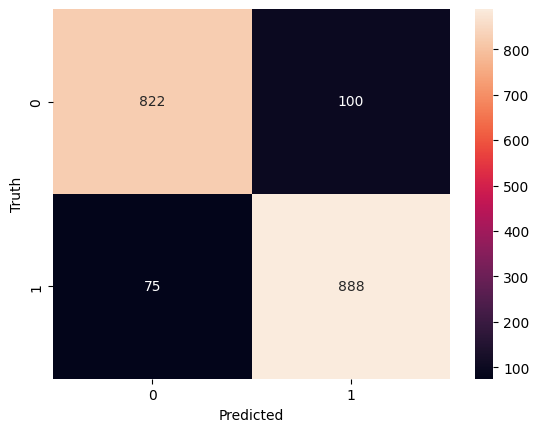

In [25]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [26]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90       922
           1       0.90      0.92      0.91       963

    accuracy                           0.91      1885
   macro avg       0.91      0.91      0.91      1885
weighted avg       0.91      0.91      0.91      1885



In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predicted)
print(accuracy)

0.9071618037135278


In [30]:
import os
print(os.getcwd())

/content


In [33]:
import os
os.chdir('/content/sample_data')

In [34]:
import pickle

# Assuming 'model' is your trained model
with open('/content/sample_data/bertmodel.pkl', 'wb') as f:
    pickle.dump(model, f)


In [35]:
from google.colab import files

files.download('/content/sample_data/bertmodel.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>